In [1]:
#pip install palmerpenguins

import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from palmerpenguins import load_penguins
df = load_penguins()

In [2]:
df.head()
# bill lenght+bill depth, flipper length+body mass

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
df = df.drop(['island','sex', 'year'], axis='columns') 
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0


In [4]:
df = df.dropna()
df.head()


,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0


In [5]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
# classes are clearly distinguished

df0 = df[:151]      #   Adeline
df1 = df[151:274]   #   Genoo
df2 = df[274:]      #   Chinstrap


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

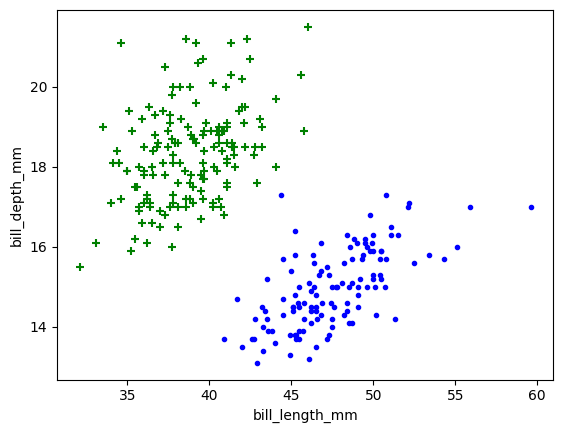

In [8]:
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')

plt.scatter(df0['bill_length_mm'], df0['bill_depth_mm'], color = "green", marker = '+')
plt.scatter(df1['bill_length_mm'], df1['bill_depth_mm'], color = "blue", marker = '.')

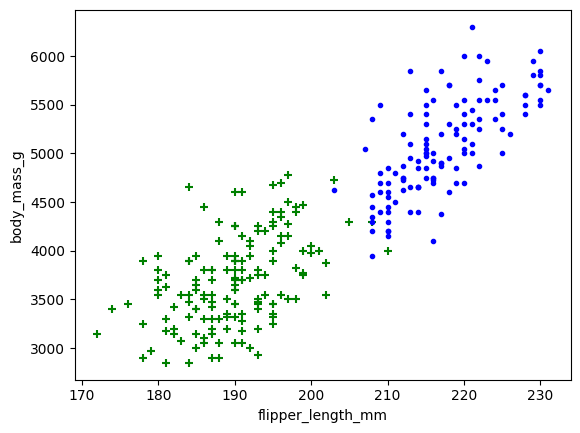

In [9]:
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')

plt.scatter(df0['flipper_length_mm'], df0['body_mass_g'], color = "green", marker = '+')
plt.scatter(df1['flipper_length_mm'], df1['body_mass_g'], color = "blue", marker = '.')

**Train test split**

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0


In [12]:
X = df.drop(['species'], axis='columns')   #   here we're just dropping the 2 extra columns of infos, so we only have the raw data
target = df['species'].unique()
y = df['species'] 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
len(X_train)

273

In [15]:
len(X_test)

69

**Create KNN (K Neighrest Neighbour Classifier)**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [17]:
knn.fit(X_train, y_train)       #   we train the machine to learn the patterns of the data

KNeighborsClassifier(n_neighbors=10)

In [18]:
knn.score(X_test, y_test)       #   we test the machine and how we it is trained for the new data (which is actually the test data)
#   used to measure the accuracy (grid model / confusion matrix / contingency table)

0.7101449275362319

**Plot Confusion Matrix**

In [19]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)        #   prediction
#   The predict method takes the test features (X_test) and returns the predicted class labels for those features. 
    #   it predicts / guesses the name of the flower based on the test feature values we provided of them

cm = confusion_matrix(y_test, y_pred)
#   confusion_matrix function takes two arguments: y_test and y_pred. These are as follows:
    #   y_test: This is the true or actual target values (class labels) from the test dataset. It represents the ground truth values, which you know to be correct.
    #   y_pred: This is the predicted class labels obtained from the KNN model for the test dataset.
cm

array([[27,  0,  2],
       [13,  3,  1],
       [ 3,  1, 19]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

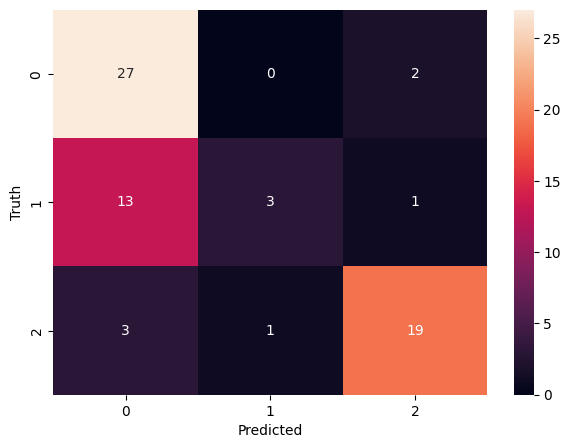

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Print classification report for precesion, recall and f1-score for each classes**

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.63      0.93      0.75        29
   Chinstrap       0.75      0.18      0.29        17
      Gentoo       0.86      0.83      0.84        23

    accuracy                           0.71        69
   macro avg       0.75      0.64      0.63        69
weighted avg       0.74      0.71      0.67        69



-----------------------------------------------------------------------------

# interesting usecases:

- video recognition: with the help of Knn, faces of individuals can be recognized survelliance  footage
- risk of loan: bansk can asses the providing of loan to individuals
- healthcare: Knn is used to make predictions on the risk of heart attacks and various types of cancers by calculating the most likely gene expressions 


--------------------------------------------------------------------------------------------------------------

In [22]:
knn = KNeighborsClassifier(n_neighbors=7) 
k = 5 # parts to split the dataset in 
kf = KFold(n_splits=k)

accuracy_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

average_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print(average_accuracy)


0.5990622335890878
